➡️ Nahraj CSV soubor s prodeji videoher (např. vgsales.csv)


Saving vgsales.csv to vgsales.csv
Top 4 platformy: ['PS2', 'X360', 'PS3', 'Wii']


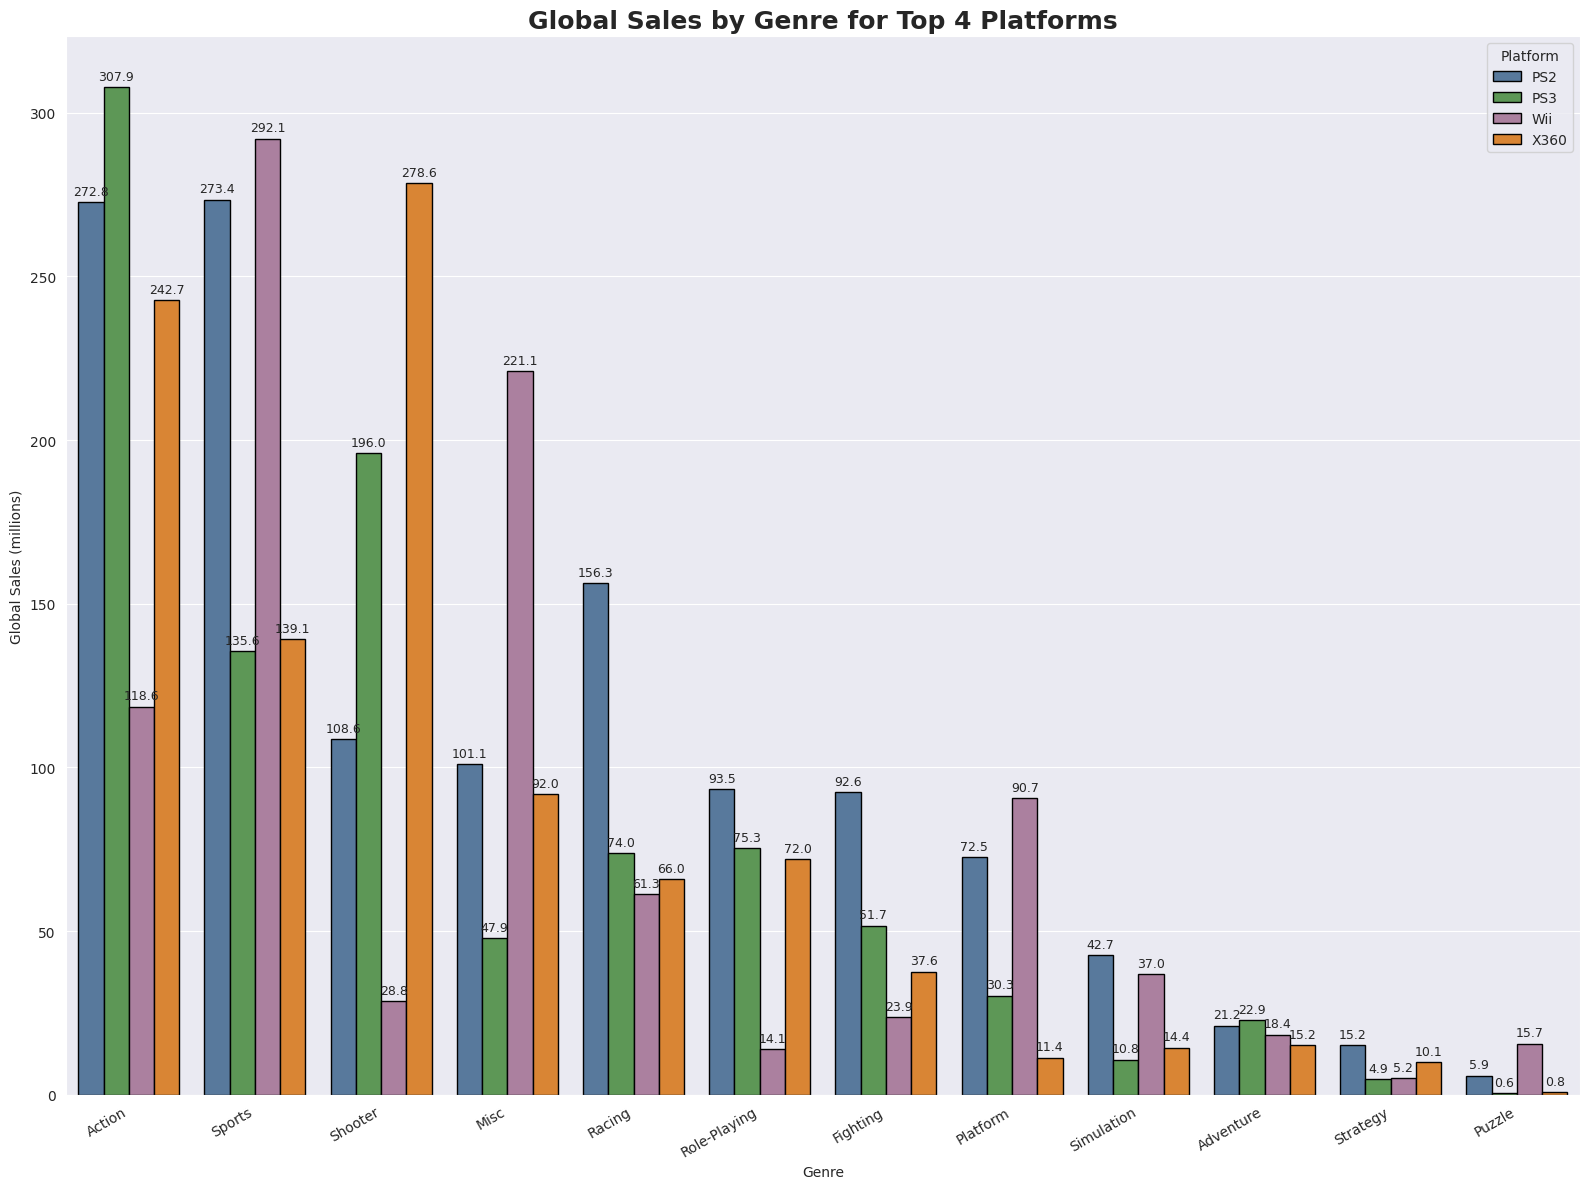

✅ Uloženo jako 'games_by_genre_top4_platforms.png'


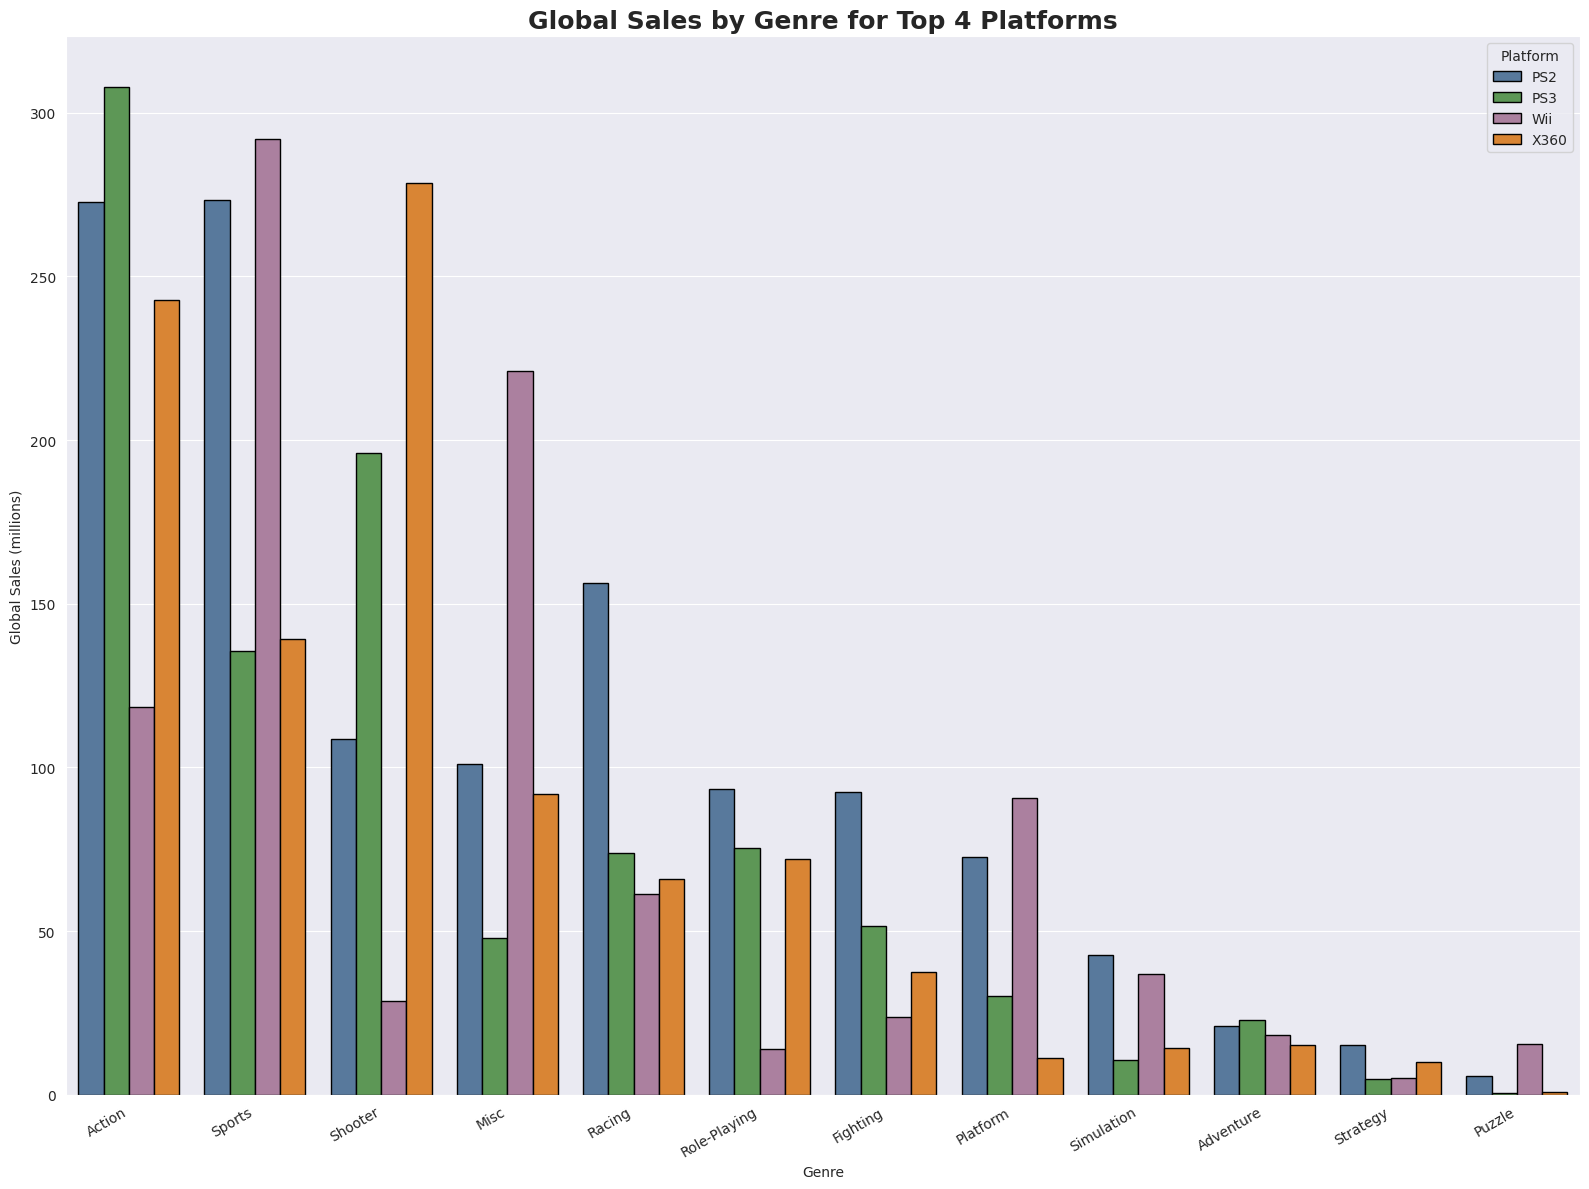

In [1]:
# 1) Importy
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

# 2) Načtení dat
# - Colab: vyzve k nahrání CSV
# - Lokálně: změň 'PATH' na cestu k souboru
if 'google.colab' in sys.modules:
    from google.colab import files
    print("➡️ Nahraj CSV soubor s prodeji videoher (např. vgsales.csv)")
    up = files.upload()  # vyber soubor v dialogu
    csv_path = list(up.keys())[0]
else:
    csv_path = "vgsales.csv"  # <- změň podle sebe

# Načti jen potřebné sloupce
usecols = ["Platform", "Genre", "Global_Sales"]
games_df = pd.read_csv(csv_path, usecols=usecols)

# 3) Najdi 4 platformy s nejvyšším součtem globálních prodejů
top_platforms = (
    games_df.groupby("Platform", as_index=False)["Global_Sales"]
    .sum()
    .sort_values("Global_Sales", ascending=False)
    .head(4)["Platform"]
    .tolist()
)
print("Top 4 platformy:", top_platforms)

# 4) Filtrovaná data jen pro top 4 platformy
filtered = games_df[games_df["Platform"].isin(top_platforms)].copy()

# 5) Agregace: součet globálních prodejů podle (Žánr × Platforma)
agg_df = (
    filtered.groupby(["Genre", "Platform"], as_index=False)["Global_Sales"]
    .sum()
    .rename(columns={"Global_Sales": "Global_Sales_total"})
)

# 6) Vytvoř vlastní barevnou paletu pro PLATFORMY
#    (hex barvy můžeš kdykoli přepsat dle Data Color Pickeru)
custom_colors = ["#4C78A8", "#F58518", "#54A24B", "#B279A2"]  # 4 kontrastní barvy
palette_map = {plat: col for plat, col in zip(top_platforms, custom_colors)}

# 7) Pořadí žánrů si můžeme seřadit dle celkových prodejů (přehlednější osy)
genre_order = (
    agg_df.groupby("Genre")["Global_Sales_total"].sum().sort_values(ascending=False).index
)

# 8) Vykreslení sloupcového grafu:
#    - osa X = Genre (žánr)
#    - osa Y = celkové globální prodeje
#    - hue = Platform (4 platformy, vlastní paleta)
plt.figure(figsize=(16, 12))
ax = sns.barplot(
    data=agg_df,
    x="Genre", y="Global_Sales_total",
    hue="Platform",
    order=genre_order,
    palette=palette_map,
    edgecolor="black"
)

# 9) Popisky hodnot na sloupcích (value labels)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{height:.1f}",
                    (p.get_x() + p.get_width() / 2, height),
                    ha="center", va="bottom", fontsize=9, rotation=0, xytext=(0, 3),
                    textcoords="offset points")

# 10) Titulky, osa, legenda
ax.set_title("Global Sales by Genre for Top 4 Platforms", fontsize=18, weight="bold")
ax.set_xlabel("Genre")
ax.set_ylabel("Global Sales (millions)")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Platform", frameon=True)

plt.tight_layout()
plt.show()

# 11) Uložení
plt.figure(figsize=(16, 12))
sns.barplot(
    data=agg_df, x="Genre", y="Global_Sales_total",
    hue="Platform", order=genre_order, palette=palette_map, edgecolor="black"
)
plt.title("Global Sales by Genre for Top 4 Platforms", fontsize=18, weight="bold")
plt.xlabel("Genre"); plt.ylabel("Global Sales (millions)")
plt.xticks(rotation=30, ha="right"); plt.legend(title="Platform")
plt.tight_layout(); plt.savefig("games_by_genre_top4_platforms.png", dpi=300)
print("✅ Uloženo jako 'games_by_genre_top4_platforms.png'")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# uložit graf
plt.savefig("/content/drive/MyDrive/Colab Notebooks/games_by_genre_top4.png", dpi=300)

# uložit data
agg_df.to_csv("/content/drive/MyDrive/Colab Notebooks/agg_games.csv", index=False)

<Figure size 640x480 with 0 Axes>